# Assignment-02: Clustering
Course: Data Science

Course Code: IoT 4313

# Submitted To: Nurjahan Nipa
Lecturer

Dept. of IoT and Robotics Engineering

# Submitted By: Sabrina Shawon
ID: 1801002

Dept. of IoT and Robotics Engineering

Course: Data Science Lab

Course-Code: IoT-4314

Date of Submission: 13/10/2023 

In [1]:
!pip install panda

At the very first I import all the necessary libraries here

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

Here I have load the csv file: Mall_Customers.csv

In [3]:
data=pd.read_csv('Mall_Customers.csv')

data

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


# PART (A): 
K-means Clustering: In this part, you will be utilizing K-means clustering algorithm to identify the appropriate number of clusters. You may use any language and libraries to implement K-mean clustering algorithm. Your K-mean clustering algorithm should look for appropriate values of K at least in the range of 0 to 15 and show their corresponding sum-of-squared errors (SSE). 

D:\BDU\Semester\3.2\LAB\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\BDU\Semester\3.2\LAB\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
D:\BDU\Semester\3.2\LAB\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
D:\BDU\Semester\3.2\LAB\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can a

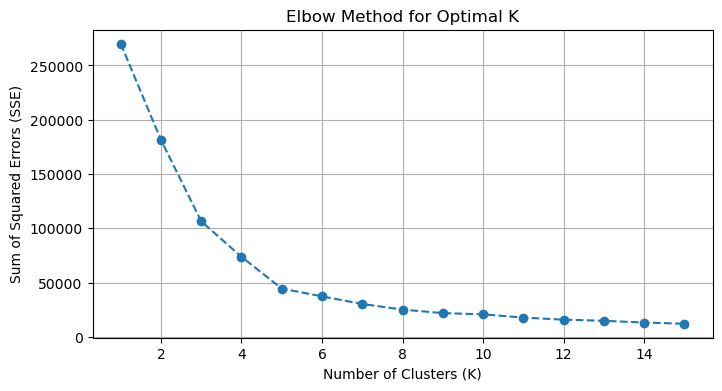

KMeans(n_clusters=15, random_state=0)
SSE:  [269981.28, 181363.59595959596, 106348.37306211119, 73679.78903948834, 44448.45544793371, 37265.86520484346, 30259.65720728547, 25095.703209997548, 21830.041978049438, 20736.679938924128, 17702.59593229628, 15810.838613705502, 14763.330402558204, 13165.329070181626, 12064.939000692291]


In [4]:
# Select the columns we want for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Range of K values to consider
k_values = range(1, 16)

# Initialize an empty list to store SSE values
sse = []

# Perform K-means clustering for different values of K and calculate SSE
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

# Plot the SSE values for different K values
plt.figure(figsize=(8, 4))
plt.plot(k_values, sse, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.title('Elbow Method for Optimal K')
plt.grid(True)
plt.show()   

print(kmeans)
print("SSE: ",sse)

# PART (B)
Hierarchical  Clustering: In this part, you will apply hierarchical clustering algorithm (agglomerative or divisive) to the provided  mall dataset. 

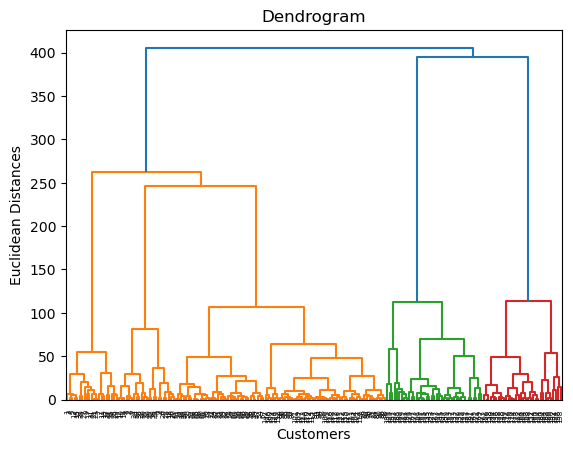

In [5]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Select the columns we want for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Perform agglomerative hierarchical clustering
dendrogram = dendrogram(linkage(X, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

# PART (C)
Density-based Clustering: In this part, you will apply density-based clustering algorithm to the provided dataset. 

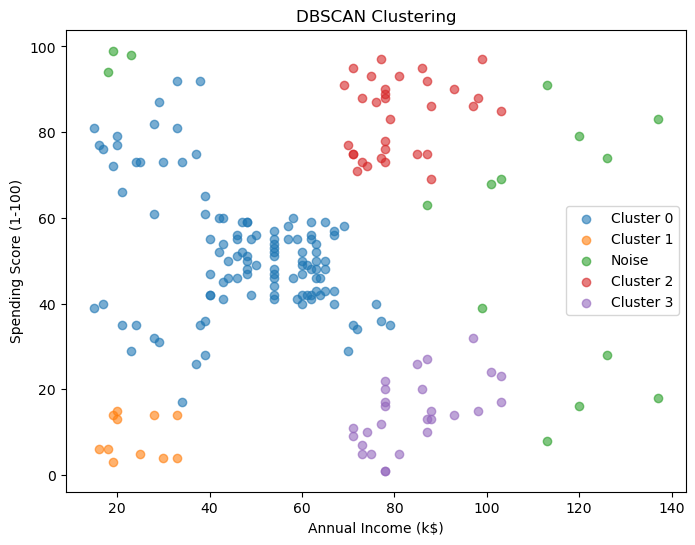

In [6]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# Select the columns we want for clustering
X = data[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Standardize the data
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Perform DBSCAN clustering
dbscan = DBSCAN(eps=0.4, min_samples=5)
labels = dbscan.fit_predict(X)

# Add cluster labels to the DataFrame
data['Cluster'] = labels

# Plot the clusters
plt.figure(figsize=(8, 6))
for cluster in data['Cluster'].unique():
    plt.scatter(data[data['Cluster'] == cluster]['Annual Income (k$)'],
                data[data['Cluster'] == cluster]['Spending Score (1-100)'],
                label=f'Cluster {cluster}' if cluster != -1 else 'Noise', alpha=0.6)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('DBSCAN Clustering')
plt.legend()
plt.show()
